In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import solver, cdt
import argparse
import numpy as np

# load mnist data

In [2]:
#transform = transforms.Compose([transforms.Resize((64, 64)),transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./MNIST/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./MNIST/', train=False, transform=transforms.ToTensor(), download=True)

# data preprocessing

In [3]:
batch_size = 100
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Training settings

In [4]:
parser = argparse.ArgumentParser(description='PyTorch Convolution Decision Tree Example(MNIST)')
parser.add_argument('--batch-size', type=int, default=100, metavar='N',
                    help='input batch size for training (default: 100)')
parser.add_argument('--input-nc', type=int, default=1, metavar='N',
                    help='input number of channel(default: 1)')
parser.add_argument('--input-dim', type=int, default=28*28, metavar='N',
                    help='input dimension size(default: 28*28)')
parser.add_argument('--input-height', type=int, default=28, metavar='N',
                    help='input height size(default: 28)')
parser.add_argument('--output-dim', type=int, default=10, metavar='N',
                    help='output dimension size(default: 10)')
parser.add_argument('--max-depth', type=int, default=3, metavar='N',
                    help='maximum depth of tree(default: 3)')
parser.add_argument('--lmbda', type=float, default=0.01, metavar='LR',
                    help='temperature rate (default: 0.01)')
parser.add_argument('--n-tree', type=int, default=3, metavar='N',
                    help='number of trees for CDForest(default: 3)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')

parser.add_argument('--max-epoch', type=int, default=100, metavar='N',
                    help='number of epochs to train (default: 20)')
parser.add_argument('--disp-freq', type=int, default=100, metavar='N',
                    help='display frequency')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                    help='learning rate (default: 0.01)')
parser.add_argument('--seed', type=int, default=0, metavar='S',
                    help='random seed (default: 0)')
parser.add_argument('-f') # dont know why, but useful
args = parser.parse_args()

args.cuda = not args.no_cuda and torch.cuda.is_available()
torch.manual_seed(args.seed)
np.random.seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

# modeling and optimizer

In [5]:
model = cdt.CDTree(args)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
if args.cuda:
    model.cuda()
    print('RUNNING WITH GPU')
else:
    model.cpu()
    print("WARNING: RUNNING WITHOUT GPU")

RUNNING WITH GPU


# Training

In [6]:
args.disp_freq = 500
model, train_loss, train_acc = solver.train_val(model, optimizer, criterion, train_loader, val_loader,
                                                    args.max_epoch, args.disp_freq, args.cuda, True)

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1][100]	 Batch [500][500]	 Training Loss 0.0366	 Accuracy 0.9900

Epoch [1]	 Average training loss 0.0835	 Average training accuracy 0.9611
Epoch [1]	 Average validation loss 0.0525	 Average validation accuracy 0.9772

Epoch [2][100]	 Batch [500][500]	 Training Loss 0.0747	 Accuracy 0.9700

Epoch [2]	 Average training loss 0.0437	 Average training accuracy 0.9819
Epoch [2]	 Average validation loss 0.0545	 Average validation accuracy 0.9772

Epoch [3][100]	 Batch [500][500]	 Training Loss 0.0248	 Accuracy 0.9900

Epoch [3]	 Average training loss 0.0373	 Average training accuracy 0.9844
Epoch [3]	 Average validation loss 0.0421	 Average validation accuracy 0.9810

Epoch [4][100]	 Batch [500][500]	 Training Loss 0.0290	 Accuracy 0.9900

Epoch [4]	 Average training loss 0.0350	 Average training accuracy 0.9856
Epoch [4]	 Average validation loss 0.0426	 Average validation accuracy 0.9823

Epoch [5][100]	 Batch [500][500]	 Training Loss 0.0617	 Accuracy 0.9700

Epoch [5]	 Average trai

Epoch [37][100]	 Batch [500][500]	 Training Loss 0.0283	 Accuracy 0.9900

Epoch [37]	 Average training loss 0.0238	 Average training accuracy 0.9899
Epoch [37]	 Average validation loss 0.0344	 Average validation accuracy 0.9832

Epoch [38][100]	 Batch [500][500]	 Training Loss 0.0152	 Accuracy 1.0000

Epoch [38]	 Average training loss 0.0227	 Average training accuracy 0.9909
Epoch [38]	 Average validation loss 0.0389	 Average validation accuracy 0.9826

Epoch [39][100]	 Batch [500][500]	 Training Loss 0.0196	 Accuracy 0.9800

Epoch [39]	 Average training loss 0.0224	 Average training accuracy 0.9910
Epoch [39]	 Average validation loss 0.0320	 Average validation accuracy 0.9858

Epoch [40][100]	 Batch [500][500]	 Training Loss 0.0185	 Accuracy 0.9900

Epoch [40]	 Average training loss 0.0227	 Average training accuracy 0.9907
Epoch [40]	 Average validation loss 0.0316	 Average validation accuracy 0.9878

Epoch [41][100]	 Batch [500][500]	 Training Loss 0.0397	 Accuracy 0.9800

Epoch [41]

Epoch [73][100]	 Batch [500][500]	 Training Loss 0.0238	 Accuracy 0.9900

Epoch [73]	 Average training loss 0.0223	 Average training accuracy 0.9908
Epoch [73]	 Average validation loss 0.0343	 Average validation accuracy 0.9861

Epoch [74][100]	 Batch [500][500]	 Training Loss 0.0299	 Accuracy 0.9800

Epoch [74]	 Average training loss 0.0224	 Average training accuracy 0.9913
Epoch [74]	 Average validation loss 0.0350	 Average validation accuracy 0.9851

Epoch [75][100]	 Batch [500][500]	 Training Loss 0.0110	 Accuracy 1.0000

Epoch [75]	 Average training loss 0.0219	 Average training accuracy 0.9905
Epoch [75]	 Average validation loss 0.0358	 Average validation accuracy 0.9823

Epoch [76][100]	 Batch [500][500]	 Training Loss 0.0200	 Accuracy 0.9900

Epoch [76]	 Average training loss 0.0229	 Average training accuracy 0.9907
Epoch [76]	 Average validation loss 0.0342	 Average validation accuracy 0.9865

Epoch [77][100]	 Batch [500][500]	 Training Loss 0.0120	 Accuracy 1.0000

Epoch [77]

# Test and plot

Testing...


/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


The test accuracy is 0.9852.



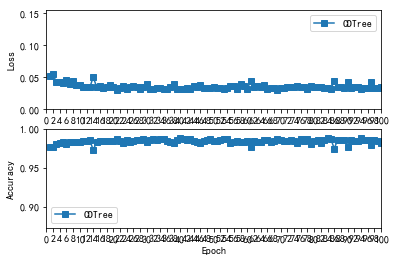

In [7]:
test_acc = solver.test_model(model, criterion, test_loader, args.cuda)
solver.plot_loss_and_acc({'CDTree': [train_loss, train_acc]})